# SHAP (SHapley Additive exPlanations)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
import shap


CALIFORNIA = fetch_california_housing()


def shap_plot_contributions(values, features, plot_type: str) -> None:
    """Plot explanatory variables contribution."""
    shap.summary_plot(
        shap_values=values,
        features=features,
        plot_type=plot_type
    )


def shap_plot_dependencies(
    values,
    features,
    indicator: str,
    interaction_index: str = None
) -> None:
    """Plot explanatory variables dependencies."""
    shap.dependence_plot(
        ind=indicator,
        interaction_index=interaction_index,
        shap_values=values,
        features=features
    )


/usr/local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Prepare dataset.
df = pd.DataFrame(
    CALIFORNIA.data,
    columns=CALIFORNIA.feature_names
)
df['Price'] = CALIFORNIA.target

In [3]:
# Split the data into Explanatory and Objective variables.
X = df[CALIFORNIA.feature_names]
y = df[
    ['Price']
]

# Split dataset into training and test data.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0
)

print(f'X_train length: {len(X_train)}')
display(X_train.head())
print(f'\nX_test length: {len(X_test)}')
display(X_test.head())

X_train length: 14448


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
1989,1.9750,52.0,2.800000,0.700000,193.0,4.825000,36.73,-119.79
256,2.2604,43.0,3.671480,1.184116,836.0,3.018051,37.77,-122.21
7887,6.2990,17.0,6.478022,1.087912,1387.0,3.810440,33.87,-118.04
4581,1.7199,17.0,2.518000,1.196000,3051.0,3.051000,34.06,-118.28
1993,2.2206,50.0,4.622754,1.161677,606.0,3.628743,36.73,-119.81



X_test length: 6192


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14740,4.1518,22.0,5.663073,1.075472,1551.0,4.180593,32.58,-117.05
10101,5.7796,32.0,6.107226,0.927739,1296.0,3.020979,33.92,-117.97
20566,4.3487,29.0,5.930712,1.026217,1554.0,2.910112,38.65,-121.84
2670,2.4511,37.0,4.992958,1.316901,390.0,2.746479,33.20,-115.60
15709,5.0049,25.0,4.319261,1.039578,649.0,1.712401,37.79,-122.43


In [4]:
# Construct Decision tree regression model.
tree_regressor = DecisionTreeRegressor(
    max_depth=3,
    random_state=0
).fit(X_train, y_train)

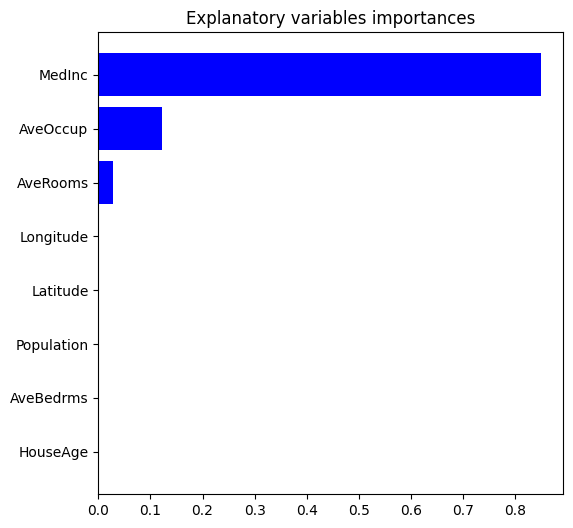

In [5]:
# Plot explanatory variables importances.
importances = tree_regressor.feature_importances_

features = X_train.columns
indices = np.argsort(importances)
indices_length: int = len(indices)

plt.figure(figsize=(6, 6))
plt.barh(
    range(indices_length),
    importances[indices],
    color='b',
    align='center'
)
plt.yticks(
    range(indices_length),
    features[indices]
)
plt.title('Explanatory variables importances')
plt.show()

In [6]:
# Calculate prediction.
X_test_prediction = X_test.copy()
X_test_prediction['Prediction'] = np.round(
    tree_regressor.predict(X_test),
    2
)

X_test_prediction.describe()[
    ['MedInc', 'AveOccup', 'AveRooms', 'Longitude', 'Prediction']
]

,MedInc,AveOccup,AveRooms,Longitude,Prediction
count,6192.000000,6192.000000,6192.000000,6192.000000,6192.000000
mean,3.880013,3.140976,5.442057,-119.576839,2.072251
std,1.920007,15.796292,2.862733,1.996529,0.849822
min,0.499900,0.692308,1.465753,-124.300000,1.170000
25%,2.552150,2.436452,4.414452,-121.790000,1.640000
50%,3.529600,2.825041,5.227365,-118.500000,1.880000
75%,4.768750,3.285501,6.064257,-118.020000,2.710000
max,15.000100,1243.333333,141.909091,-114.490000,4.880000


In [7]:
X_test_prediction.sort_values('MedInc')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Prediction
3249,0.4999,23.0,6.054545,1.672727,198.0,3.600000,36.09,-119.99,1.17
13999,0.4999,10.0,6.740000,2.040000,108.0,2.160000,34.69,-116.90,1.17
6343,0.4999,52.0,3.875000,0.562500,44.0,2.750000,34.06,-117.75,1.64
4861,0.4999,29.0,2.373272,1.055300,2690.0,12.396313,34.02,-118.28,1.64
19435,0.5360,16.0,2.111111,2.111111,166.0,18.444444,37.67,-121.04,1.64
...,...,...,...,...,...,...,...,...,...
6591,15.0001,34.0,8.114173,1.023622,825.0,3.248031,34.19,-118.19,4.88
4604,15.0001,52.0,8.444954,1.100917,693.0,3.178899,34.06,-118.33,4.88
8848,15.0001,52.0,8.907583,1.099526,1407.0,3.334123,34.08,-118.39,4.88
8805,15.0001,34.0,8.783019,1.059748,1871.0,2.941824,33.76,-118.34,4.88


In [8]:
# Construct SHAP model.
explainer = shap.TreeExplainer(tree_regressor)
shap_values = explainer.shap_values(X_test)

shap_values

array([[ 1.93485115e-02,  0.00000000e+00, -3.33206030e-02, ...,
        -1.72899029e-01,  0.00000000e+00,  0.00000000e+00],
       [ 9.10998208e-01,  0.00000000e+00, -3.33206030e-02, ...,
        -2.35586033e-01,  0.00000000e+00,  0.00000000e+00],
       [ 1.93485115e-02,  0.00000000e+00, -3.33206030e-02, ...,
        -1.72899029e-01,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 2.28446171e+00,  0.00000000e+00, -3.33206030e-02, ...,
        -1.49403646e-03,  0.00000000e+00,  0.00000000e+00],
       [-7.02650150e-01,  0.00000000e+00, -1.21346947e-01, ...,
        -7.07095446e-02,  0.00000000e+00,  0.00000000e+00],
       [ 1.93485115e-02,  0.00000000e+00, -3.33206030e-02, ...,
        -1.72899029e-01,  0.00000000e+00,  0.00000000e+00]])

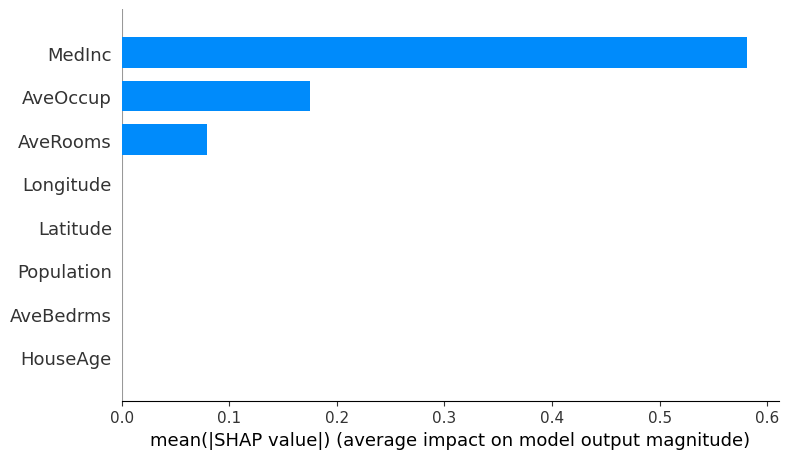

In [9]:
# Plot explanatory variables contribution.
shap_plot_contributions(
    shap_values,
    X_test,
    'bar'
)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


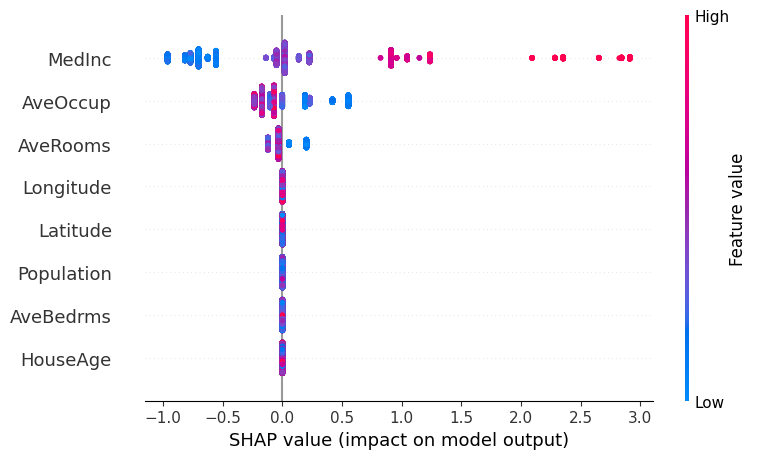

In [10]:
shap_plot_contributions(
    shap_values,
    X_test,
    'dot'
)

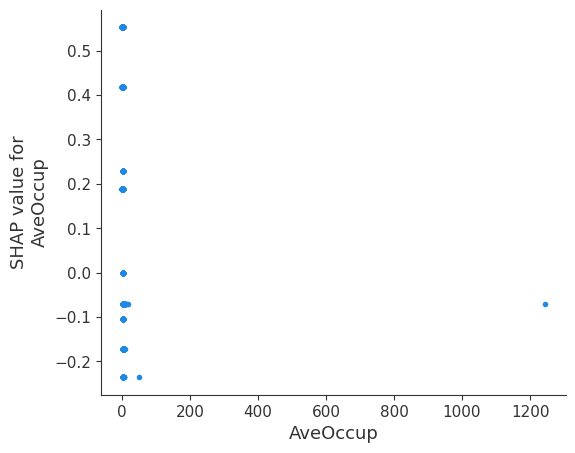

In [11]:
# Plot explanatory variables dependencies.
shap_plot_dependencies(
    shap_values,
    X_test,
    'AveOccup'
)

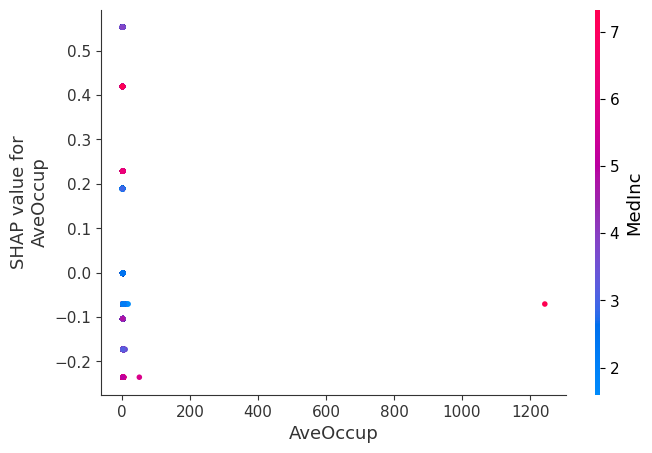

In [12]:
shap_plot_dependencies(
    shap_values,
    X_test,
    'AveOccup',
    'MedInc'
)